## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
from datetime import datetime
from dateutil.relativedelta import relativedelta

## DATA CLEANING

### Se buscará limpiar el dataset para su posterior análisis:
- Se unirán los dos dataset
- Se buscarán duplicados
- Se quitarán columnas innecesarias
- Se buscarán valores nulos y erroneos
- Se ajustará el tipo de datos a lo que requiera la columna


#### Preparación

In [2]:
### cargo los dos dataset en diferentes variables

d1 = pd.read_csv("users_raw.csv")
d2 = pd.read_csv("users.csv")

In [3]:
### Inspecciono como lucen las primeras filas de cada dataset

display(d1.head())
display(f'Este dataframe tiene {len(d1.columns)} columnas')
display(d2.head())
display(f'Este dataframe tiene {len(d2.columns)} columnas')

,id,created_at,birthdate,gender,city,state,profile_completed
0,1,2016-01-07 18:10:23,1978-11-13,M,Bogotá,Cundinamarca,96.0
1,12,2016-01-07 18:10:23,1980-11-25,M,Medellín,Antioquia,100.0
2,112,2016-01-18 17:28:56,1995-07-17,F,Envigado,Antioquia,84.0
3,121,2016-01-18 17:28:57,1996-06-01,M,Medellín,Antioquia,100.0
4,169,2016-01-18 17:29:03,1985-12-19,M,Medellin,Antioquia,90.0


'Este dataframe tiene 7 columnas'

,user_id,desired_state,last_role,dreamt_companies,forms_to_work,benefits_sought,my_languages,last_study,level_last_study,interested_areas,...,views_to_resume_received,views_to_profile_received,saved_from_playlist,reactions_received,average_feedback,selector_appearances,reactiones_made,match_with_playlists,contents_viewed,connections_sent
0,1.0,freelancer,CTO,['https://www.apple.com/'],"['virtual', 'mixed', 'in_house']","['bonuses', 'flexible_schedules', 'personal_re...","[['ES', 'advanced'], ['EN', 'advanced', None]]",Ingeniería de Sistemas,other,"['Calidad de Software', 'Formación', 'Tecnolog...",...,NaN,2.0,NaN,NaN,4.75,NaN,NaN,NaN,NaN,2.0
1,9670.0,entrepreneur,Líder en gestión de procesos,"['https://www.rutanmedellin.org/es/', 'http://...","['in_house', 'mixed']","['bonuses', 'study_opportunities', 'scholarshi...",[],Tecnología en sistemas electromecánicos,other,"['Física', 'Diseño', 'Ecología', 'Tecnología',...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23825.0,employment,Líder de proyectos Masivos,"['https://www.medtronic.com/co-es/index.html',...","['virtual', 'in_house', 'mixed']","['flexible_schedules', 'study_opportunities', ...",[],Bioingeniería,NaN,"['Starups', 'Marketing Digital Móvil', 'Progra...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2245.0,employment,Lider de desarollo,"[None, None, None]",[],[],"[[None, None, None]]",Ingeniería de Sistemas,other,"['Desarrollo de software', 'asf;aslkf;aslkfa;s...",...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,24328.0,freelancer,Diseñadora Gráfica Freelancer,"['https://www.kalley.com.co/', 'https://www.ma...",['virtual'],"['study_opportunities', 'flexible_schedules', ...","[[None, None, None]]",Gestión Del Diseño Gráfico,other,"['Diseño gráfico', 'Mercadeo', 'marketing digi...",...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0


'Este dataframe tiene 29 columnas'

In [4]:
### chekeo que id y user_id no tengan duplicados ni nulos

print(f'd1 tiene {d1.id.isnull().sum()} valores nulos en la columna id')
print(f'd1 tiene {d1.id.duplicated().sum()} valores duplicados en la columna id')
print(f'd2 tiene {d2.user_id.isnull().sum()} valores nulos en la columna user_id')
print(f'd2 tiene {d2.user_id.duplicated().sum()} valores duplicados en la columna user_id')


d1 tiene 0 valores nulos en la columna id
d1 tiene 0 valores duplicados en la columna id
d2 tiene 0 valores nulos en la columna user_id
d2 tiene 0 valores duplicados en la columna user_id


In [5]:
### convierto a int los valores


d1['id'] = d1['id'].astype(int)
d2['user_id'] = d2['user_id'].astype(int)

In [6]:
### Reseteo los índices para que queden ordenados segun el id y el user_id

d1 = d1.sort_values(by = 'id').reset_index(drop=True)
d2 = d2.sort_values(by = 'user_id').reset_index(drop=True)

In [7]:
### Compruebo que los dataframes se puedan unir sin problemas a través de id y user_id

d1['id'].equals(d2['user_id'])

True

In [8]:
### Uno los dataframes

d3 = pd.merge(d1, d2, left_on='id', right_on = 'user_id')

In [9]:
### Elimino la columna user_id 

d3 = d3.drop('user_id', axis = 1)

#### Tratamiento de registros nulos

<AxesSubplot:>

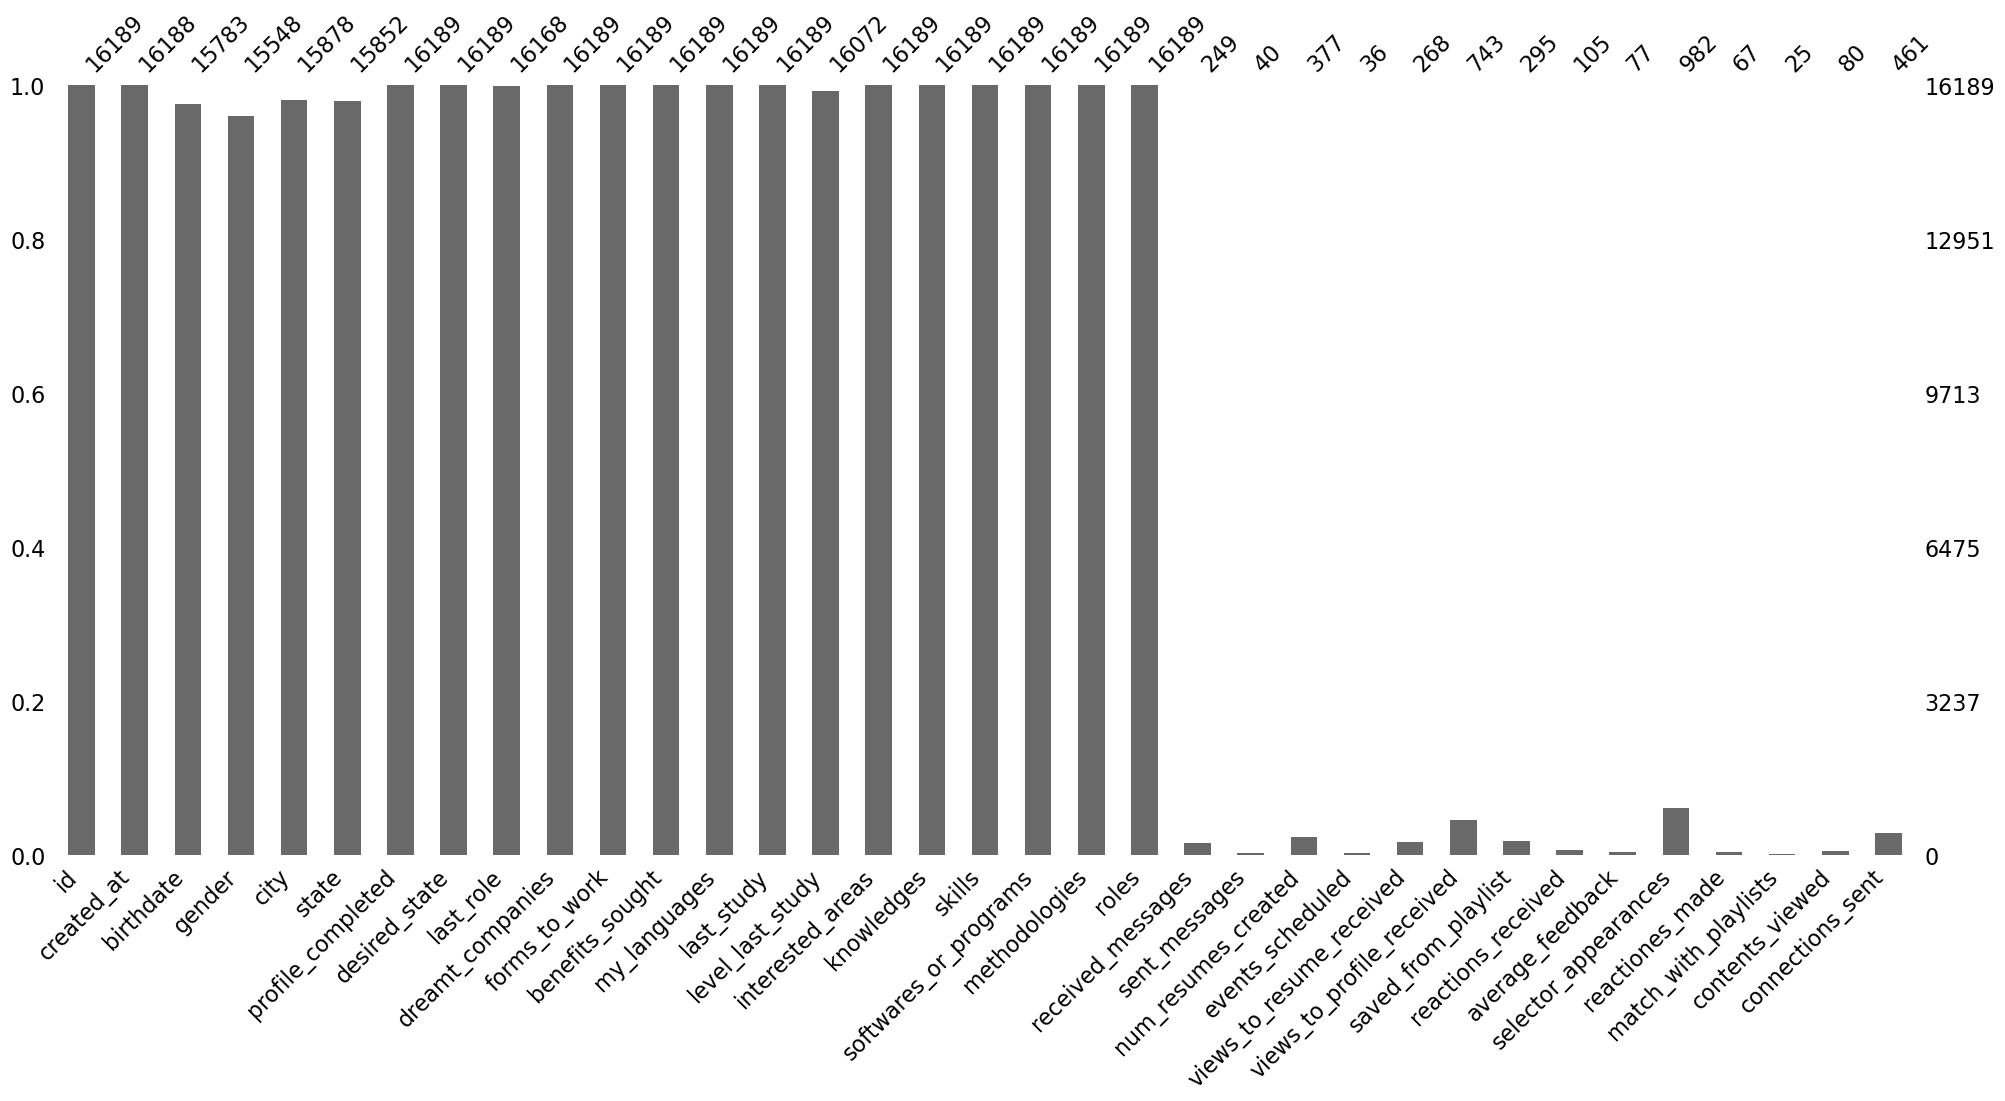

In [10]:
### Vamos a inspeccionar los datos nulos (NaN) del dataset

msno.bar(d3)

In [11]:
### Los NaN de las columnas ['received_messages', 'sent_messages', 'num_resumes_created', 'events_scheduled', 'views_to_resume_received',
### 'views_to_profile_received', 'saved_from_playlist', 'reactions_received', 'selector_appearances', 'reactiones_made',
### 'match_with_playlists', 'contents_viewed', 'connections_sent', 'average_feedback'] 
### serán convertidos a 0 pues asumo que si no hay registro es porque su contador es 0
### Incluída la columna 'average_feedback'pues no parace ser el promedio de ninguna otra columna

In [12]:
columnas_a_llenar = ['received_messages', 'sent_messages', 'num_resumes_created', 'events_scheduled', 'views_to_resume_received',
'views_to_profile_received', 'saved_from_playlist', 'reactions_received', 'selector_appearances', 'reactiones_made',
'match_with_playlists', 'contents_viewed', 'connections_sent', 'average_feedback']

d3[columnas_a_llenar] = d3[columnas_a_llenar].fillna(value = 0)

<AxesSubplot:>

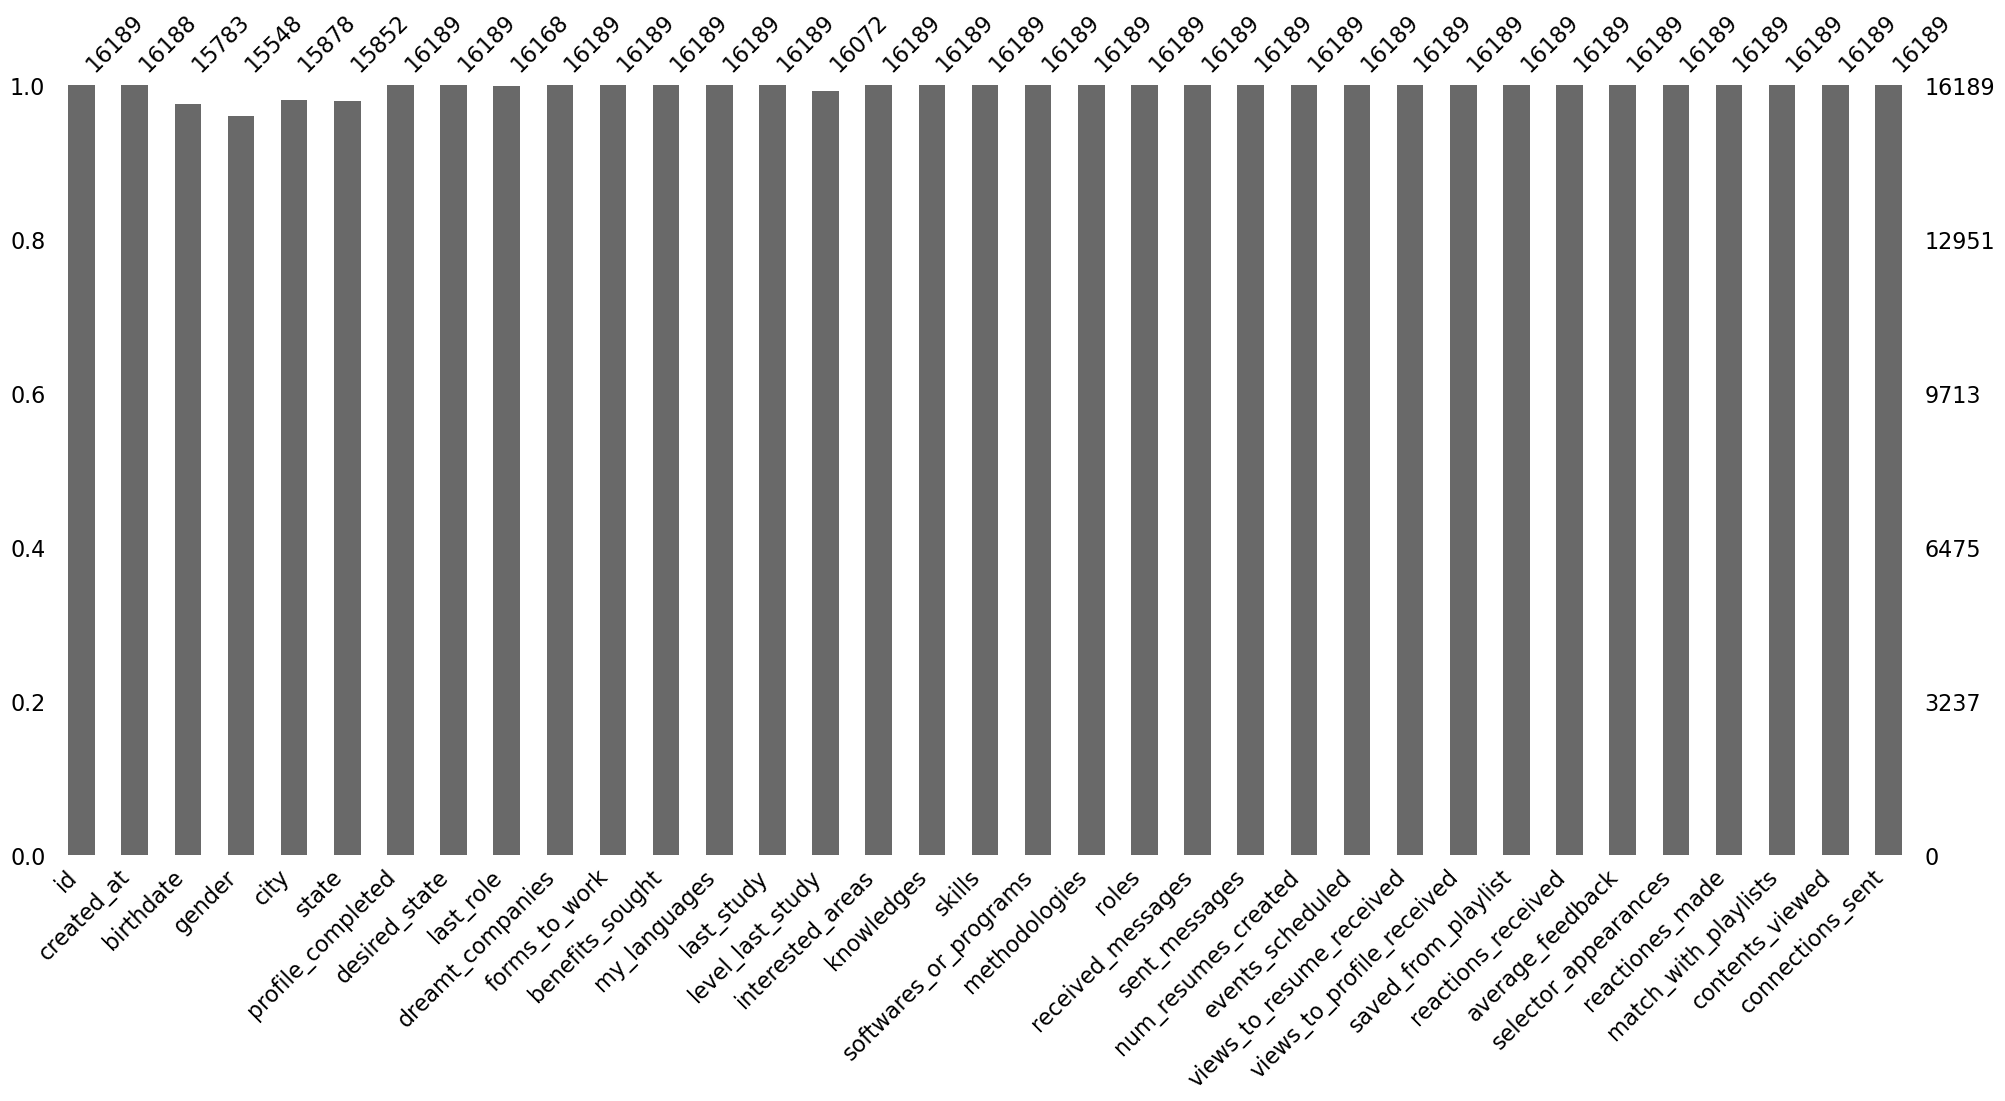

In [13]:
### Veamos como quedó ahora
msno.bar(d3)

In [14]:
### Hay registros que no son nulos pero son incorrectos, por ejemplo hay listas vacías, hay . y - en roles, hay [None], etc. Todos esos
### registros serán reemplazados por np.nan en todo el dataframe. Como son variables categóricas no se realizará ninguna imputación.

In [15]:
valores_a_reemplazar = ['[]', '[[None, None, None]]', '[None, None, None]', '[None]', 
                        '[None, None]', '.', '...', '-', '--', '---', '[...]', '[.]',
                         '[....]', '[--]']

d3 = d3.replace(valores_a_reemplazar, np.nan)
d3.head(25)

,id,created_at,birthdate,gender,city,state,profile_completed,desired_state,last_role,dreamt_companies,...,views_to_resume_received,views_to_profile_received,saved_from_playlist,reactions_received,average_feedback,selector_appearances,reactiones_made,match_with_playlists,contents_viewed,connections_sent
0,1,2016-01-07 18:10:23,1978-11-13,M,Bogotá,Cundinamarca,96.0,freelancer,CTO,['https://www.apple.com/'],...,0.0,2.0,0.0,0.0,4.75,0.0,0.0,0.0,0.0,2.0
1,12,2016-01-07 18:10:23,1980-11-25,M,Medellín,Antioquia,100.0,entrepreneur,CEO,['Google'],...,0.0,8.0,0.0,0.0,4.63,0.0,3.0,0.0,1.0,10.0
2,112,2016-01-18 17:28:56,1995-07-17,F,Envigado,Antioquia,84.0,employment,Auxiliar Administrativa,"['https://gruponutresa.com/', 'https://www.seg...",...,0.0,0.0,0.0,0.0,0.00,2.0,0.0,0.0,0.0,0.0
3,121,2016-01-18 17:28:57,1996-06-01,M,Medellín,Antioquia,100.0,employment,Líder Talento,"['https://cristianrestrepoq.wordpress.com', 'h...",...,0.0,14.0,1.0,0.0,4.11,0.0,0.0,0.0,0.0,5.0
4,169,2016-01-18 17:29:03,1985-12-19,M,Medellin,Antioquia,90.0,employment,Coordinador de Sistemas,"['bancolombia', 'personalsoft']",...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2.0
5,617,2016-02-01 15:38:03,1981-01-12,F,Medellín,Antioquia,41.0,freelancer,Gerente regional - America Latina,NaN,...,0.0,2.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,5.0
6,662,2016-02-04 08:20:30,1995-06-15,M,Medellín,Antioquia,64.0,employment,Presidente Ejecutivo Local,"['https://www.rutanmedellin.org/es/', 'https:/...",...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
7,717,2016-02-05 07:42:58,1991-12-21,F,Avondale Estates,Georgia,37.0,first_job,Office Manager,NaN,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
8,807,2016-02-08 08:34:59,1987-03-23,F,Santa Elena,NaN,55.0,freelancer,Gestora de Emprendimiento,"['https://www.un.org/es/about-un/', 'https://i...",...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
9,809,2016-02-08 09:43:48,1978-10-29,F,Medellín,Antioquia,98.0,entrepreneur,Marketing,NaN,...,0.0,8.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2.0


<AxesSubplot:>

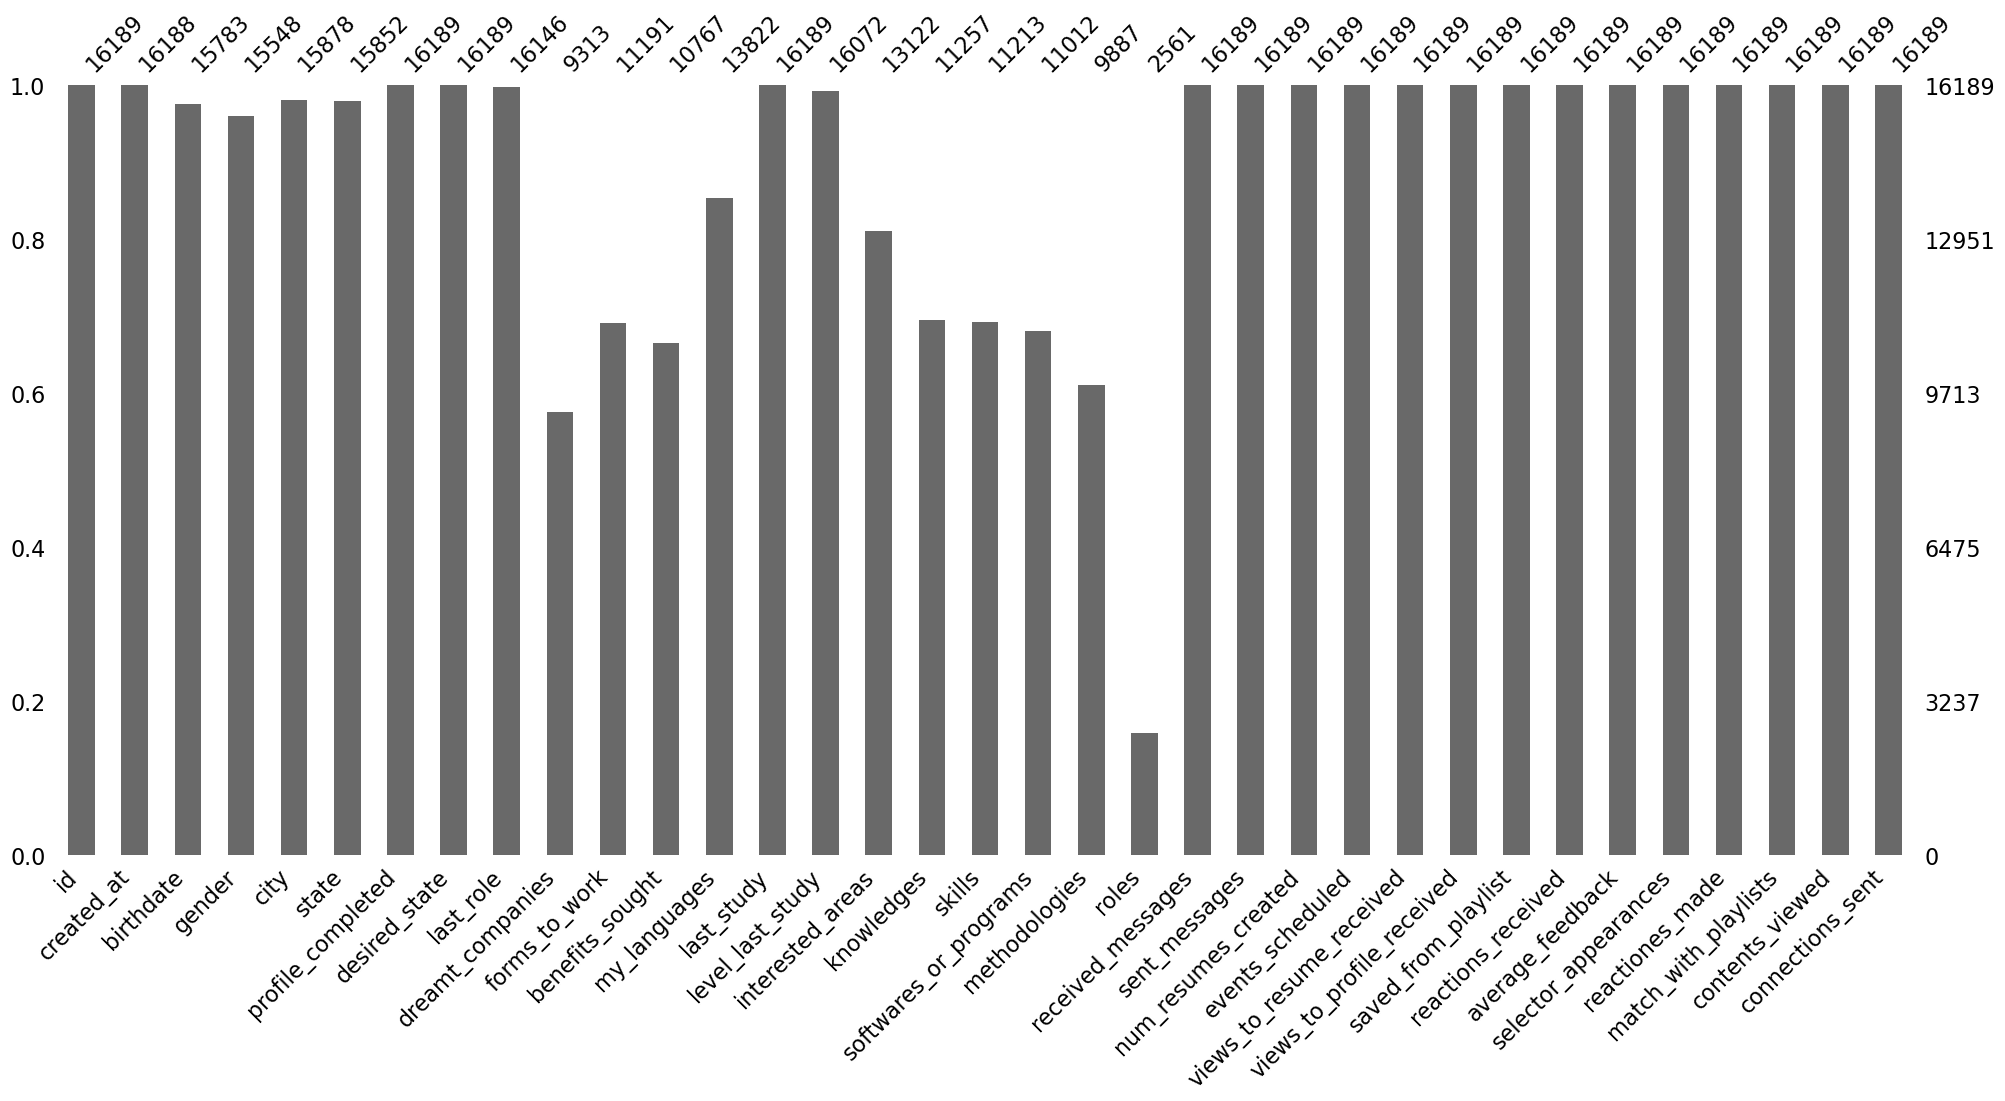

In [16]:
msno.bar(d3)

#### Modificación de type de registros

In [17]:
### Voy a inspeccionar que tipo de datos tiene y debería tener cada columna

d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16189 entries, 0 to 16188
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16189 non-null  int32  
 1   created_at                 16188 non-null  object 
 2   birthdate                  15783 non-null  object 
 3   gender                     15548 non-null  object 
 4   city                       15878 non-null  object 
 5   state                      15852 non-null  object 
 6   profile_completed          16189 non-null  float64
 7   desired_state              16189 non-null  object 
 8   last_role                  16146 non-null  object 
 9   dreamt_companies           9313 non-null   object 
 10  forms_to_work              11191 non-null  object 
 11  benefits_sought            10767 non-null  object 
 12  my_languages               13822 non-null  object 
 13  last_study                 16189 non-null  obj

In [18]:
### Las columnas 'created_at' y 'birthdate' deberían ser tipo datetime
###
### Las columnas 'received_messages', 'sent_messages', 'num_resumes_created', 'events_scheduled', 'views_to_resume_received',
### 'views_to_profile_received', 'saved_from_playlist', 'reactions_received', 'selector_appearances', 'reactiones_made',
### 'match_with_playlists', 'contents_viewed', 'connections_sent' 
### deberían ser de tipo int


In [19]:
columnas_a_convertir_int = ['received_messages', 'sent_messages', 'num_resumes_created', 'events_scheduled', 'views_to_resume_received',
'views_to_profile_received', 'saved_from_playlist', 'reactions_received', 'selector_appearances', 'reactiones_made',
'match_with_playlists', 'contents_viewed', 'connections_sent']
d3[columnas_a_convertir_int] = d3[columnas_a_convertir_int].astype(int)

d3['birthdate'] = d3['birthdate'].apply(pd.to_datetime)
d3['created_at'] = d3['created_at'].apply(pd.to_datetime)

In [20]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16189 entries, 0 to 16188
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         16189 non-null  int32         
 1   created_at                 16188 non-null  datetime64[ns]
 2   birthdate                  15783 non-null  datetime64[ns]
 3   gender                     15548 non-null  object        
 4   city                       15878 non-null  object        
 5   state                      15852 non-null  object        
 6   profile_completed          16189 non-null  float64       
 7   desired_state              16189 non-null  object        
 8   last_role                  16146 non-null  object        
 9   dreamt_companies           9313 non-null   object        
 10  forms_to_work              11191 non-null  object        
 11  benefits_sought            10767 non-null  object        
 12  my_l

In [21]:
### d3 es el nombre de la variable donde esta almacenado el dataset limpio

## INSIGHT DISCOVERY

#### Top 5 dreamt_companies by desired_state and level_last_study for users with more than 10 connections_sent .

##### Preparación de la vista

In [22]:
### Voy a remover las direcciones web de la columna 'dremt_companies' así solo quedan en forma de lista.

def clean_company_name(name):
    if isinstance(name, str):
        a = name.lower()
    #   pattern = r'(https?:\/\/)?(www\.)?([a-zA-Z0-9-]+)\.(com|net|org|io|us)(\/.*)?'
        pattern = re.compile(r'(https?://)?(www\.)?([a-zA-Z0-9-]+)\.(com|net|org|io|co|us)(/.*)?', re.IGNORECASE)
        match = re.search(pattern, str(a))
        if match:
            return match.group(3)
        else:
            return a
    else:
        return name


d3['dreamt_companies'] = d3['dreamt_companies'].apply(clean_company_name)

d3['dreamt_companies']

0                                             apple
1                                        ['google']
2                                      gruponutresa
3                                         wordpress
4                   ['bancolombia', 'personalsoft']
                            ...                    
16184                           ['google, amazon,']
16185                        ['google', 'facebook']
16186    ['bbc', 'the guardian', 'cambio colombia']
16187         ['organizaciones con trabajo remoto']
16188          ['mercado libre', 'rappi', 'google']
Name: dreamt_companies, Length: 16189, dtype: object

In [23]:
### Ahora armemos un nuevo dataframe con las columnas que voy a utilizar para mostrar uno de los insights pedidos

d4 = d3.loc[:, ['dreamt_companies', 'desired_state', 'level_last_study', 'connections_sent']].copy()

In [24]:
# Filtrar los registros con connections_sent > 10
d4 = d4[d4['connections_sent'] > 10]


In [25]:
d4

,dreamt_companies,desired_state,level_last_study,connections_sent
2984,['facebook'],employment,technologist,13
11009,venturatravel,freelancer,undergraduate,394
11804,['apple'],first_job,master_degree,15
13209,boweryfarming,employment,undergraduate,50
13478,talentpitch,entrepreneur,undergraduate,69


In [26]:
### Convierto la columna dreamt_companies en valores individuales usando explode()
### Quito los [ ] y las , de los registros

d4 = d4.explode('dreamt_companies')
d4['dreamt_companies'] = d4['dreamt_companies'].apply(str).str.strip('[]').str.replace("'", "")

In [27]:
d4

,dreamt_companies,desired_state,level_last_study,connections_sent
2984,facebook,employment,technologist,13
11009,venturatravel,freelancer,undergraduate,394
11804,apple,first_job,master_degree,15
13209,boweryfarming,employment,undergraduate,50
13478,talentpitch,entrepreneur,undergraduate,69


In [28]:
### Agrupo y cuento

d4_top5 = d4.groupby(['desired_state', 'level_last_study', 'dreamt_companies'])['connections_sent'].count().reset_index(name='count')

In [29]:
### Ordenar por número de ocurrencias
d4_top5 = d4_top5.sort_values(['desired_state', 'level_last_study', 'count'], ascending=[True, True, True])

In [30]:
### Seleccionar los top 5 por combinación de desired_state y level_last_study
d4_top5 = d4_top5.groupby(['desired_state', 'level_last_study']).head(5)

#### Vista

In [31]:
### Muestra el top 5 de dreamt_companies agrupados segun desired_state y last_level_study para usuarios con mas de 10 connections_sent
d4_top5

,desired_state,level_last_study,dreamt_companies,count
0,employment,technologist,facebook,1
1,employment,undergraduate,boweryfarming,1
2,entrepreneur,undergraduate,talentpitch,1
3,first_job,master_degree,apple,1
4,freelancer,undergraduate,venturatravel,1


####  Top 3 most common skills for users with average_feedback greater than 4, grouped by last_study .

In [32]:
### Armo el dataframe que utilizare para mostrar esta vista

d5 = d3.loc[:, ['average_feedback', 'last_study', 'skills']].copy()


In [33]:
### convierto todo a minúscula

d5 = d5.applymap(lambda x: x.lower() if isinstance(x, str) else x)

d5['skills'] = d5['skills'].str.replace("[", "").str.replace("]", "").str.replace("'", "")

In [34]:
### Filtrar los registros con 'average_feedback' mayor que 4.

d5_filtered = d5[d5['average_feedback'] > 4].copy()
d5_filtered = d5_filtered.dropna()
d5_filtered = d5_filtered.reset_index().drop('index', axis = 1)

d5_filtered = d5_filtered.copy()

In [35]:
lista_nombres = [skill.split(',') for skill in d5_filtered['skills']]
d5_filtered['skills'] = lista_nombres



In [36]:
d5_explode = d5_filtered.explode('skills')

In [37]:

d5_explode['skills'] = d5_explode['skills'].astype(str)

In [38]:
### Agrupo los datos y cuento los valores
df_grouped = d5_explode.groupby(['last_study', 'skills'])['skills'].count().reset_index(name='count')

### Se ordenan los datos dentro de cada grupo por conteo descendiente
df_sorted = df_grouped.sort_values(['last_study', 'count'], ascending=[True, False])

### Se seleccionan los 3 valores más frecuentes para cada last_study
df_top3 = df_sorted.groupby('last_study').head(3)




#### Vista

In [39]:
### La vista pedida

df_top3.head(20)

,last_study,skills,count
0,"1) bioingeniería, 2) maestría gestión ctei, 3)...",ingeniería,1
1,"1) bioingeniería, 2) maestría gestión ctei, 3)...",interpretación,1
2,"1) bioingeniería, 2) maestría gestión ctei, 3)...",investigación,1
6,administración de empresas,diseño experiencias de marca,1
7,administración de empresas,gestión de relaciones,1
8,administración de empresas,investigación de mercados,1
11,análisis y desarrollo de sistemas de información.,aprendizaje,1
12,análisis y desarrollo de sistemas de información.,disciplina,1
13,análisis y desarrollo de sistemas de información.,trabajo en equipo,1
15,business management,conectando,1


#### Top 3 last_role con el mayor promedio de views_to_profile_received agrupados por gender

In [40]:
### Armo la tabla con las columnas que quiero mostrar

d6 = d3.loc[:, ['last_role', 'views_to_profile_received', 'gender']].copy()

In [41]:
### Elimino los Nan y los registros con gender == '0' porque no sirven para mostrar la vista

d6 = d6.dropna()

d6 = df_filtered = d6[d6['gender'] != '0']



In [42]:
# Agrupar los datos y calcular el promedio de views_to_profile_received
d6_grouped = d6.groupby(['last_role', 'gender'])['views_to_profile_received'].mean().reset_index()

# Ordenar los datos por promedio descendente y seleccionar los primeros 3 para cada grupo de gender
d6_top3 = (d6_grouped
           .sort_values(['gender', 'views_to_profile_received'], ascending=[True, False])
           .groupby('gender').head(3))


#### Vista

In [43]:
### Muestro los 3 roles con mayor promedio de views_to_profile_received según gender

d6_top3

,last_role,gender,views_to_profile_received
6314,Instructora de baile,F,16.5
352,Administradora de Empresas,F,15.0
6463,Jefe de Egresados,F,15.0
4476,Docente Auxiliar ESAP,M,38.0
1335,Aprendiz Universitario Investigación de Mercados,M,25.0
5086,Estudiante universitario,M,22.0
900,Analista de Talento,other,0.0
1649,Asesora metodológica,other,0.0
1672,Asistente,other,0.0


## VISUALIZATION

####  Scatter plot of age vs. average_feedback

In [44]:
### Para poder mostrar este plot necesito calcular la edad de los usuarios

In [45]:
d7 = d3.loc[:, ['birthdate', 'average_feedback']].copy()

In [46]:
d7

,birthdate,average_feedback
0,1978-11-13,4.75
1,1980-11-25,4.63
2,1995-07-17,0.00
3,1996-06-01,4.11
4,1985-12-19,0.00
...,...,...
16184,NaT,0.00
16185,1997-08-05,0.00
16186,NaT,0.00
16187,NaT,0.00


In [47]:
d7 = d7.dropna()
d7

,birthdate,average_feedback
0,1978-11-13,4.75
1,1980-11-25,4.63
2,1995-07-17,0.00
3,1996-06-01,4.11
4,1985-12-19,0.00
...,...,...
16176,1988-04-05,0.00
16178,1995-02-16,0.00
16180,1996-06-19,0.00
16182,1991-09-13,0.00


In [48]:
now = datetime.now()
d7['edad'] = d7['birthdate'].apply(lambda x: relativedelta(now, x).years)

C:\Users\eze_1\AppData\Local\Temp\ipykernel_8244\371676920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d7['edad'] = d7['birthdate'].apply(lambda x: relativedelta(now, x).years)


In [49]:
d7['edad'].describe()

count    15783.000000
mean        31.339986
std          8.929048
min          0.000000
25%         25.000000
50%         29.000000
75%         36.000000
max        136.000000
Name: edad, dtype: float64

In [50]:
d7['edad'].value_counts().sort_values()

135      1
4        1
5        1
79       1
136      1
      ... 
24     879
28     890
27     931
25     946
26     981
Name: edad, Length: 68, dtype: int64

In [51]:
### como evidentemente hay valores atípicos, voy a filtrar solo los registros que estén entre 18 y 65 años de edad, 
### lo que usualmente es el rango en el que una persona puede trabajar

In [52]:
mask = d7['edad'].between(18, 65)

d7 = d7[mask]


In [53]:
x = d7['edad']
y = d7['average_feedback']


#### Plot

c:\Users\eze_1\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='edad', ylabel='average_feedback'>

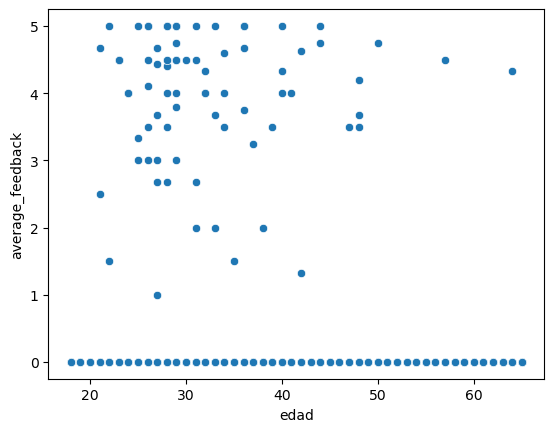

In [54]:
sns.scatterplot(x, y)

####  Heatmap of the most common languages by last_study 

In [55]:
### guardo en d8 las colummas que voy a usar

d8 = d3.loc[:, ['my_languages', 'last_study']].copy()

In [56]:
d8['my_languages'].head(25)

0        [['ES', 'advanced'], ['EN', 'advanced', None]]
1                                  [['EN', 'advanced']]
2                                                   NaN
3           [['EN', 'advanced'], ['FR', 'basic', None]]
4     [['EN', 'intermediate', None], [None, None, No...
5                                                   NaN
6                                                   NaN
7     [['EN', 'advanced', None], ['ES', 'advanced', ...
8                                                   NaN
9                               [['EN', 'basic', None]]
10                                 [['ES', None, None]]
11    [['EN', 'advanced', None], ['DE', 'intermediat...
12                           [['EN', 'advanced', None]]
13                                                  NaN
14                                                  NaN
15                           [['ES', 'advanced', None]]
16                                                  NaN
17                       [['EN', 'intermediate',

In [57]:
### voy a dropear los NaN y voy a eliminar el nivel de idioma, quedándome solo con EN, ES, DE, etc, que están como siglas de 2 letras.

d8 = d8.dropna()

In [58]:
d8['my_languages'] = d8['my_languages'].str.upper()
d8['my_languages'] = d8['my_languages'].replace(['NONE', 'BASIC', 
                    'INTERMEDIATE', 'SIMPLE', 'ADVANCED', "'", "\[", "\]", ","],
                     '', regex=True).replace('INGLES', 'EN', regex=True).replace('COLOMBIANA', 'ES', regex=True).replace('ESPAÑOL', 'ES', regex=True)
d8['my_languages'].head(30)

0                ES  EN  
1                     EN 
3                EN  FR  
4                 EN     
7               EN   ES  
9                    EN  
10                   ES  
11    EN   DE   PT   ES  
12                   EN  
15                   ES  
17                   EN  
18              EN   FR  
19                   EN  
21    ES   EN   PT   FR  
22               ES  EN  
23               ES  EN  
24              ES   EN  
25                    EN 
26                   EN  
27              ES   EN  
28                   EN  
29              ES   EN  
30                   EN  
31              DE   EN  
32                   EN  
33                   EN  
34              EN   IT  
37                   EN  
38                    ES 
39                   EN  
Name: my_languages, dtype: object

In [59]:
### Elimino los espacios en blanco

d8['my_languages'] = d8['my_languages'].str.strip().str.replace(r'\s+', ' ')

In [60]:
d8.head(20)

,my_languages,last_study
0,ES EN,Ingeniería de Sistemas
1,EN,Business Management
3,EN FR,Administración de Empresas
4,EN,Especialización Gerencia Informática
7,EN ES,Administracion de negocios
9,EN,Medico Veterinario
10,ES,Administración de Negocios/ Esp. Gerencia del ...
11,EN DE PT ES,Ingeniería Administrativa
12,EN,Ingeniería Mecánica
15,ES,Ingenieria Industrial


In [61]:
### Separo los lenguajes y aplico explode() para que quede uno por fila, asi los puedo contar

d8['my_languages'] = d8['my_languages'].apply(lambda x: x.split())
d8 = d8.explode('my_languages').reset_index(drop=True)

In [62]:
d8.head(20)

,my_languages,last_study
0,ES,Ingeniería de Sistemas
1,EN,Ingeniería de Sistemas
2,EN,Business Management
3,EN,Administración de Empresas
4,FR,Administración de Empresas
5,EN,Especialización Gerencia Informática
6,EN,Administracion de negocios
7,ES,Administracion de negocios
8,EN,Medico Veterinario
9,ES,Administración de Negocios/ Esp. Gerencia del ...


In [63]:
d8['my_languages'].value_counts()

EN            12000
ES             4988
FR              678
PT              488
DE              274
IT              201
JA               44
ZH               34
RU               25
KO               21
CA               12
OTHER            12
LA               11
EO                9
AVANZADO          6
SV                4
BÁSICO            3
HR                2
AR                2
AF                2
PAP               2
-                 2
TH                2
TR                2
CH                2
INTERMEDIO        2
ANG               2
LENGUA            1
AM                1
ID                1
BR                1
CY                1
VO                1
(LSC)             1
PL                1
CS                1
GU                1
FI                1
GL                1
FA                1
HE                1
UK                1
TL                1
SEÑAS             1
LV                1
AZ                1
QU                1
NL                1
Name: my_languages, dtype: int64

In [84]:
### Elimino registros que son lenguajes erroneos

d8 = d8.query('my_languages != "AVANZADO" & my_languages != "BASICO" & my_languages != "OTHER"')

In [85]:
### Agrupo , armo una tabla y cuento. Filtro los lenguajes que aparecen mas de una vez

d8_counts = d8.groupby(['my_languages', 'last_study']).size().unstack().fillna(0)
d8_counts = d8_counts[d8_counts > 1].dropna(how='all', axis=0).dropna(how='all', axis=1)

#### Plot

<AxesSubplot:xlabel='last_study', ylabel='my_languages'>

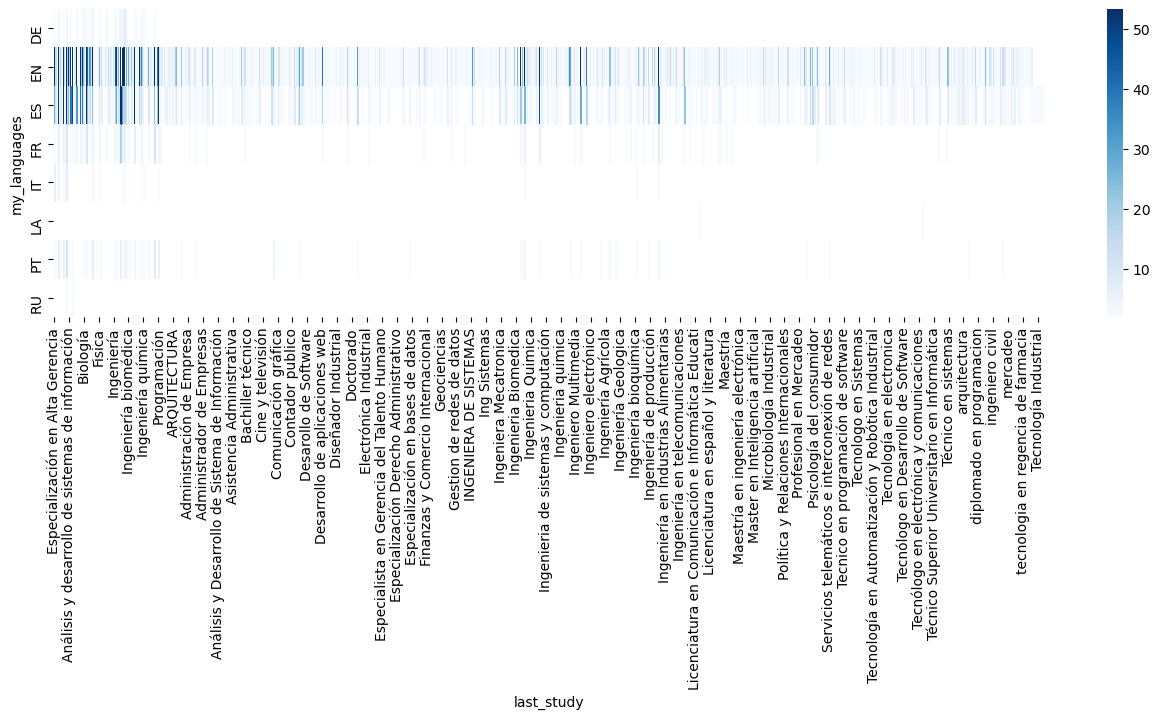

In [94]:
### En azul oscuro se ven los lenguajes mas comunes de acuerdo al last_study

fig, ax = plt.subplots(figsize=(16,4))
sns.heatmap(d8_counts, cmap="Blues", ax=ax, robust = True)

####  Scatter plot of views_to_resume_received vs. reactions_received, colored by profile_completed

In [95]:
#### Armo el dataset con las columnas que usaré para armar el plot

d9 = d3.loc[:, ['views_to_resume_received', 'reactions_received', 'profile_completed']]

#### Plot

<AxesSubplot:xlabel='reactions_received', ylabel='views_to_resume_received'>

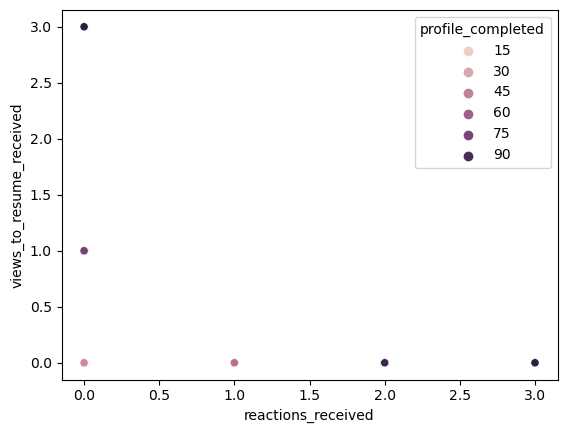

In [108]:
sns.scatterplot(x = d9['reactions_received'], y = d9['views_to_resume_received'], hue = d9['profile_completed'])